In [1]:
# haversine function
from math import sin, cos, sqrt, atan2, radians
# for plotting
import matplotlib.pyplot as plt
# managing the dataframe
import pandas as pd
import numpy as np

In [19]:
# creating a dataframe from csv file containing every capital along with latitude and longitude
data = pd.read_csv(r'C:\Users\Pavilion\Downloads\country-capitals.csv') 
data.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [3]:
# creating a copy of the dataframe and droping 'CountryCode', then selecting only countries from Europe
df = data.copy()
df.drop('CountryCode', axis=1, inplace=True)
df = df[df['ContinentName'] == 'Europe']
df.drop(['ContinentName'], axis=1, inplace=True)
df.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude
4,Aland Islands,Mariehamn,60.116667,19.900000
10,Albania,Tirana,41.316667,19.816667
13,Andorra,Andorra la Vella,42.500000,1.516667
18,Armenia,Yerevan,40.166667,44.500000
21,Austria,Vienna,48.200000,16.366667


In [4]:
# Getting arrays for each needed value from the dataframe, then turning lat and long to radians
cities = df.iloc[:,1].values
latitudes = df.iloc[:,2].values
longitudes = df.iloc[:,3].values

latitudes = [radians(i) for i in latitudes]
longitudes = [radians(i) for i in longitudes]

In [5]:
# Approx radius of earth (km)
r = 6371

earth_distances = [] # empty list for earth distances
# For loop to compute the haversine function on each capital
for i in range(len(cities)):
    distances = []
    # Double for loop to apply the haversine function to every possible combination of cities
    for j in range(len(cities)):
        haversine = r * (2 * atan2(sqrt(sin((latitudes[i] - latitudes[j]) / 2)**2 + cos(latitudes[i]) * cos(latitudes[j]) * sin((longitudes[i] - longitudes[j]) / 2)**2), 
                                   sqrt(1 - sin((latitudes[i] - latitudes[j]) / 2)**2 + cos(latitudes[i]) * cos(latitudes[j]) * sin((longitudes[i] - longitudes[j]) / 2)**2)))
        distances.append(haversine)
    earth_distances.append(distances) # creating a list of lists to have every combination of distances, with each row representing a capital and the distances to every other capital

In [6]:
avg_distance = [] # empty list to store average distance for each capital in relation to the other capitals
for i in range(len(earth_distances)):
    avg_distance.append(np.mean(earth_distances[i]))

# Dictionary with city name and avg distance
distanceCities = {cities[i] : avg_distance[i] for i in range(len(cities))}  

# Loop to find the lowest avg distance
for city, distance in distanceCities.items():
    if distance == min(avg_distance):
        print("The EU capital with the smallest average distance to the rest of EU capitals is:", 
              city, "with an avg distance of", round(distance,2), "km")
        
distanceCities

The EU capital with the smallest average distance to the rest of EU capitals is: Vienna with an avg distance of 1176.94 km


{'Mariehamn': 1679.0632224562967,
 'Tirana': 1414.6446920346484,
 'Andorra la Vella': 1675.496672039415,
 'Yerevan': 2486.452664212258,
 'Vienna': 1176.9406061461236,
 'Baku': 2781.7096753464457,
 'Minsk': 1499.0232115046406,
 'Brussels': 1383.9820881932314,
 'Sarajevo': 1273.1692013112047,
 'Sofia': 1413.419745956619,
 'Zagreb': 1203.5298918138492,
 'Nicosia': 2241.935599990666,
 'Prague': 1194.9352339475888,
 'Copenhagen': 1396.8957927114925,
 'Tallinn': 1696.6362800748411,
 'Torshavn': 2205.1827965300286,
 'Helsinki': 1751.411069306132,
 'Paris': 1447.8759052007617,
 'Tbilisi': 2436.6203211938105,
 'Berlin': 1258.5983874359906,
 'Gibraltar': 2372.13555624802,
 'Athens': 1721.5627367001764,
 'Saint Peter Port': 1650.1881317977382,
 'Vatican City': 1389.329612430447,
 'Budapest': 1202.6037092993695,
 'Reykjavik': 2827.5401357423752,
 'Dublin': 1849.8231689859263,
 'Douglas': 1787.4811754400498,
 'Rome': 1388.8604263734258,
 'Saint Helier': 1631.782656797205,
 'Pristina': 1360.93266548

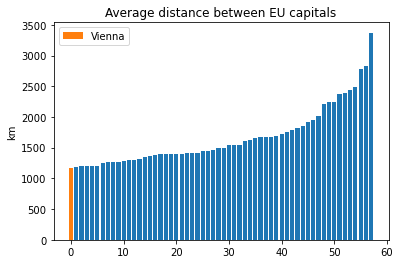

In [7]:
# Bar chart with the sorted avg values
plt.bar(range(len(cities)), sorted(avg_distance))
plt.bar(0, sorted(avg_distance)[0], label="Vienna")
plt.title("Average distance between EU capitals")
plt.ylabel("km")
plt.legend(loc='best')
plt.show()

In [8]:
###############################################################
######################### AMERICA #############################
###############################################################

In [20]:
# creating a dataframe from csv file containing every capital along with latitude and longitude
data = pd.read_csv(r'C:\Users\Pavilion\Downloads\country-capitals.csv') 
data.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [21]:
# creating a copy of the dataframe and droping a not needed column, then selecting only countries from the Americas
df = data.copy()
df.drop('CountryCode', axis=1, inplace=True)
df = df.loc[df['ContinentName'].isin(['North America', 'Central America', 'South America'])]
df.drop(['ContinentName'], axis=1, inplace=True)
df.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude
6,Saint Martin,Marigot,18.073100,-63.082200
15,Anguilla,The Valley,18.216667,-63.050000
16,Antigua and Barbuda,Saint John's,17.116667,-61.850000
17,Argentina,Buenos Aires,-34.583333,-58.666667
19,Aruba,Oranjestad,12.516667,-70.033333


In [22]:
# Getting arrays for each needed value from the dataframe, then turning lat and long to radians
cities = df.iloc[:,1].values
latitudes = df.iloc[:,2].values
longitudes = df.iloc[:,3].values

latitudes = [radians(i) for i in latitudes]
longitudes = [radians(i) for i in longitudes]

In [23]:
earth_distances = [] # empty list for earth distances
# For loop to compute the haversine function on each capital
for i in range(len(cities)):
    distances = []
    # Double for loop to apply the haversine function to every possible combination of cities
    for j in range(len(cities)):
        haversine = r * (2 * atan2(sqrt(sin((latitudes[i] - latitudes[j]) / 2)**2 + cos(latitudes[i]) * cos(latitudes[j]) * sin((longitudes[i] - longitudes[j]) / 2)**2), 
                                   sqrt(1 - sin((latitudes[i] - latitudes[j]) / 2)**2 + cos(latitudes[i]) * cos(latitudes[j]) * sin((longitudes[i] - longitudes[j]) / 2)**2)))
        distances.append(haversine)
    earth_distances.append(distances) # creating a list of lists to have a matrix with every combination of distances

# earth_distances

In [25]:
avg_distance = [] # empty list to store average distance for each capital in relation to the other capitals
for i in range(len(earth_distances)):
    avg_distance.append(np.mean(earth_distances[i]))

# Dictionary with city name and avg distance
distanceCities = {cities[i] : avg_distance[i] for i in range(len(cities))}  

# Loop to find the lowest avg distance
for city, distance in distanceCities.items():
    if distance == min(avg_distance):
        print("The American capital with the smallest average distance to the rest of American capitals is:", 
              city, "with an avg distance of", round(distance,2), "km")
        
distanceCities

The American capital with the smallest average distance to the rest of American capitals is: Willemstad with an avg distance of 1979.88 km


{'Marigot': 2024.9270881394614,
 'The Valley': 2031.3030846013137,
 "Saint John's": 2050.0330715078144,
 'Buenos Aires': 5320.884182288116,
 'Oranjestad': 1983.6292999667983,
 'Nassau': 2466.5957134556456,
 'Bridgetown': 2153.1648131407346,
 'Belmopan': 2727.861149031315,
 'Hamilton': 2911.912283384787,
 'La Paz': 3698.493558361393,
 'Brasilia': 4133.806965101059,
 'Road Town': 2006.1991005508394,
 'Ottawa': 4059.6335181720992,
 'George Town': 2374.349153115266,
 'Santiago': 5184.953931159414,
 'Bogota': 2319.4121996819104,
 'San Jose': 2494.2972524135694,
 'Havana': 2553.7729659414435,
 'Willemstad': 1979.8818603598015,
 'Roseau': 2052.257510334361,
 'Santo Domingo': 2012.493788702982,
 'Quito': 2688.1152720559667,
 'San Salvador': 2734.049813033603,
 'Stanley': 7046.66427095508,
 'Nuuk': 6041.145020604233,
 "Saint George's": 2072.184534051662,
 'Guatemala City': 2821.458628994925,
 'Georgetown': 2411.954039292402,
 'Port-au-Prince': 2053.4105974806603,
 'Tegucigalpa': 2609.1353579340

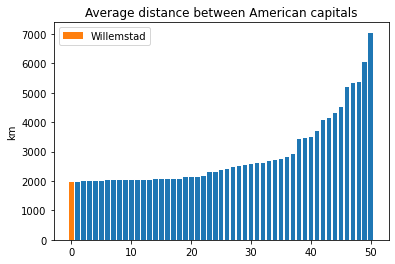

In [26]:
# Bar chart with the sorted avg values
plt.bar(range(len(cities)), sorted(avg_distance))
plt.bar(0, sorted(avg_distance)[0], label="Willemstad")
plt.title("Average distance between American capitals")
plt.ylabel("km")
plt.legend(loc='best')
plt.show()